In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
#author:June_xu


import smtplib,time
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.header import Header


class email():
    def __init__(self,mail_host='smtp.163.com',mail_user="13962310765@163.com" ,mail_pass="Sykes666",sender_name=None):
        self.mail_host=mail_host#服务器地址
        self.mail_user=mail_user#邮箱用户名
        self.mail_pass=mail_pass#邮箱密码
        self.sender_email=mail_user#发送者的邮箱地址。用于显示在邮件抬头上。
        self.sender_name=sender_name#发送者的邮箱昵称，一般不用设置。设置发件人昵称后会发件会很慢。。并且设置错了可能会收不到

    def creat_a_email(self,title='workshop革新——FAQ整理进度',receivers=['811097155@qq.com']):
        #title:邮件标题
        #receivers：数组。收件人地址。
        
        # 创建一个带附件的实例,如果不带附件，可以使用MIMEText()
        self.message = MIMEMultipart()
        self.subject = title#邮件标题
        #收件人是一个数组
        if not isinstance(receivers, list):
            self.receivers=[receivers]
        else:
            self.receivers=receivers
        # 如果发件人昵称没有设置，直接使用发件人邮箱作为
        #Header(u'from Mark<{}>'.format(sender), 'utf-8')#Header("junjie.xu", 'utf-8')
        if self.sender_name:
            self.message['From'] = u'%s<%s>'%(self.sender_name,self.sender_email)
        else:
            self.message['From'] = self.sender_email
        self.message['To'] = self.receivers[0]  # Header(receivers[0], 'utf-8')#"alan.wu"
        self.message['Subject'] = Header(self.subject, 'utf-8')

    def add_contect_text(self,text=' '):
        #正文内容
        text_head="Hi~! 我是junjie.xu\n"
        text_tail="\n\n本文发送时间："+time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))
        text_contect =text_head+text+text_tail
        self.message.attach(MIMEText(text_contect, 'plain', 'utf-8'))

    def add_file(self,file_path,file_name):
        #添加附件
        #file_path:文件路径
        #file_name:邮箱中显示的文件名
        #注意：文件名不能有空格，不然报错
        from email.header import make_header
        att1 = MIMEText(open(file_path, 'rb').read(), 'base64', 'UTF-8')
        att1["Content-Type"] = 'application/octet-stream;name="%s"' % make_header([(file_name, 'UTF-8')]).encode(
            'UTF-8')
        att1["Content-Disposition"] = 'attachment;filename= "%s"' % make_header([(file_name, 'UTF-8')]).encode('UTF-8')
        self.message.attach(att1)

    def send(self):
        try:
            self.smtp = smtplib.SMTP(self.mail_host, 25)
            self.smtp.login(self.mail_user, self.mail_pass)
            self.smtp.set_debuglevel(1)  # 不加上这代码，qq邮箱收不到。加上后，之前没收到的邮件一起收到了。然后去掉这代码测试又正常。。。
            self.smtp.sendmail(self.sender_email, self.receivers, self.message.as_string())
            print("邮件发送成功")
            self.smtp.quit()
            return True
        except smtplib.SMTPException as e:
            print("Error: 无法发送邮件", e)
            self.smtp.quit()
            return False

#使用示例
'''
em=email(mail_host='smtp.163.com',mail_user="139xxxxxx@163.com" ,mail_pass="Sykes666",sender_name='junjie.xu')
em.creat_a_email(title='我是标题',receivers=['23701xxxx@qq.com'])
em.add_contect_text(text='我是正文')
em.add_file(file_path=r'c:\rrr.xlsx',file_name='rrr.xlsx')
em.send()
'''

'\nem=email(mail_host=\'smtp.163.com\',mail_user="139xxxxxx@163.com" ,mail_pass="Sykes666",sender_name=\'junjie.xu\')\nem.creat_a_email(title=\'我是标题\',receivers=[\'23701xxxx@qq.com\'])\nem.add_contect_text(text=\'我是正文\')\nem.add_file(file_path=r\'c:\rrr.xlsx\',file_name=\'rrr.xlsx\')\nem.send()\n'

## sender_email（你的邮箱地址）和sender_name（你的邮箱昵称）的对照关系。
### 根据测试发现sender_name设置错了收到的邮件抬头是空白的。而且不管设置对不对接收都会很慢，所以最好不要设置。正常的格式是：发件人昵称<发件人邮箱>，昵称可以不填。


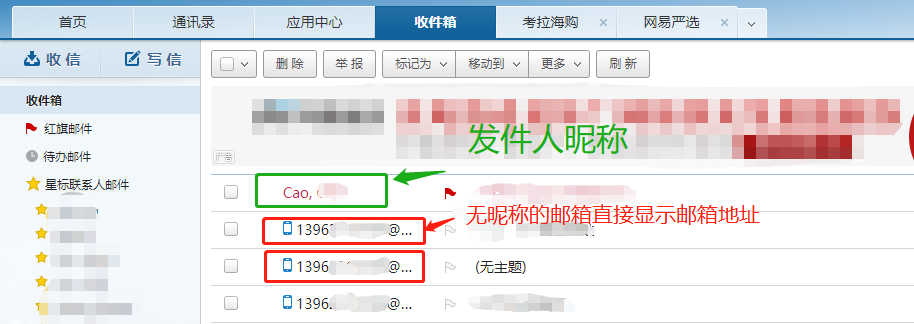



## 如何设置smtp服务器？

## * 代码中的邮箱密码是客户端密码，与邮箱登陆密码不同。以163邮箱为例（不同邮箱设置方法会有些区别，但大同小异)
### 1.网页登陆163邮箱，点击设置
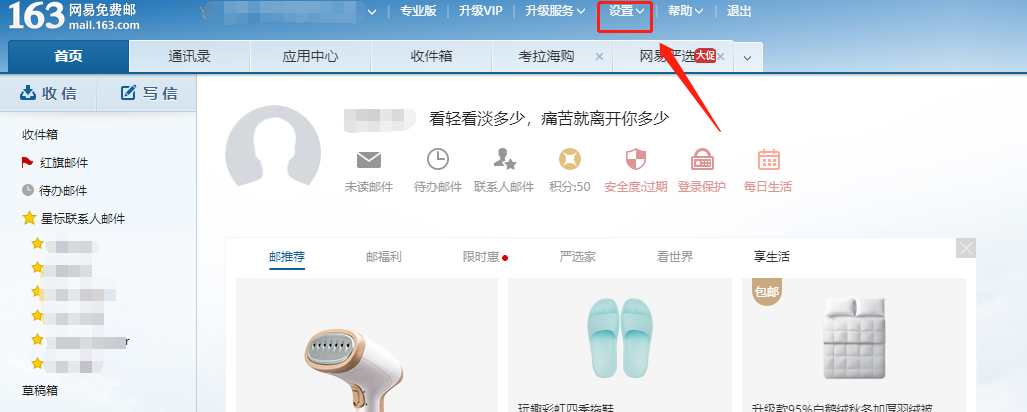

### 2.弹出的设置界面中选择[pop3/imap/smtp]，该打开的都打开。
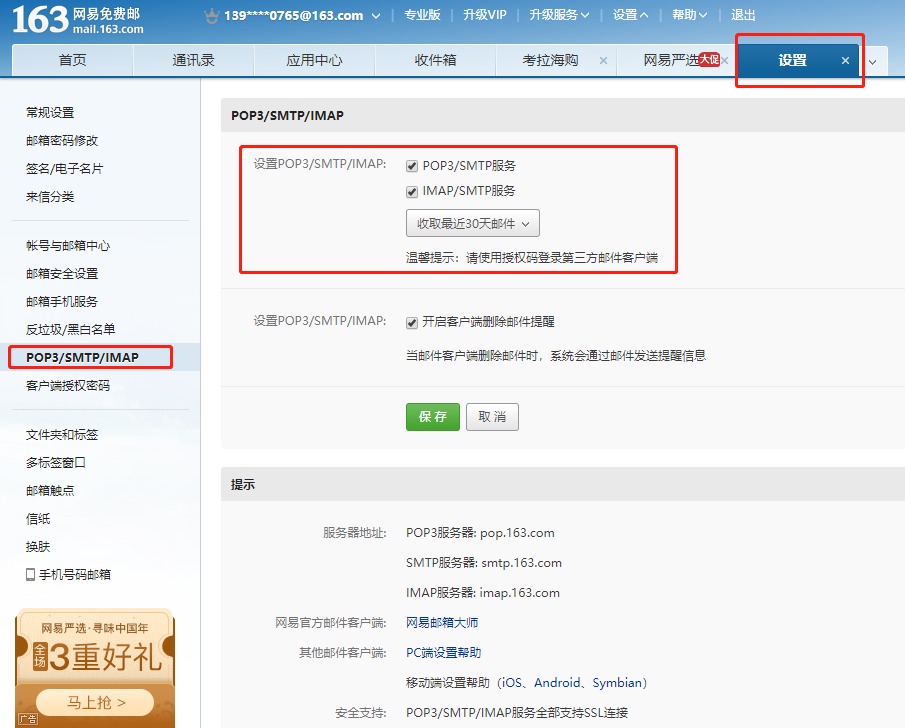

### 3.再选择[客户端授权密码],按照提示开启。这里是已经打开的状态。打开后就能用代码登陆邮箱了。
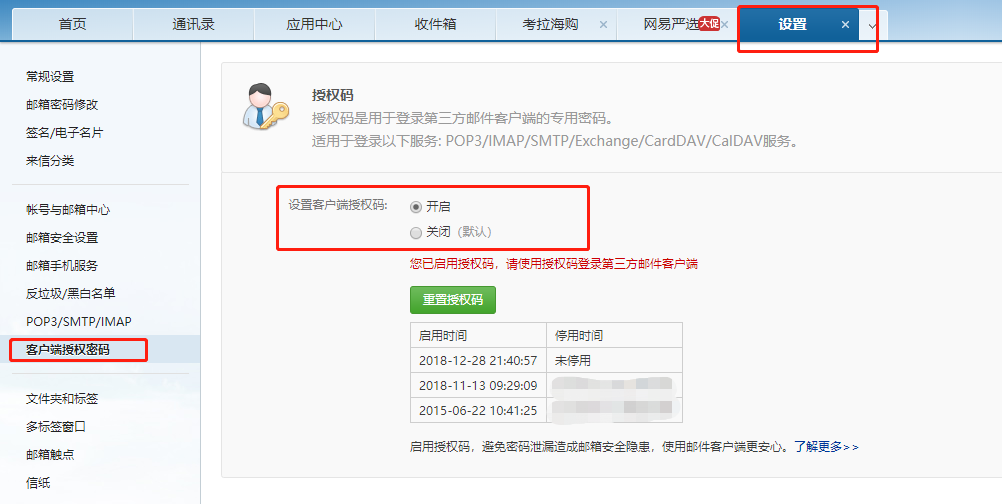
